In [1]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
pd.options.display.max_colwidth = None
pd.set_option('display.float_format', lambda x: '%.5f' %x)
pd.set_option('display.max_columns', None)
sns.set(font_scale=1.7)
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [3]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.00000,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.00000,12,88434,0,88434,Hotel,Hotel,88434.00000,NaN,NaN,NaN,NaN,NaN,60.00000,81.70000,84.30000,182.50000,189.00000,7226362.50000,7456910.00000,2003882.00000,1156514.25000,3946027.00000,12764.52930,1276453.00000,False,NaN,Compliant,NaN,249.98000,2.83000
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.00000,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.00000,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.00000,Parking,15064.00000,Restaurant,4622.00000,NaN,61.00000,94.80000,97.90000,176.10001,179.39999,8387933.00000,8664479.00000,0.00000,950425.18750,3242851.00000,51450.81641,5145082.00000,False,NaN,Compliant,NaN,295.86000,2.86000
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.00000,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.00000,41,956110,196718,759392,Hotel,Hotel,756493.00000,NaN,NaN,NaN,NaN,NaN,43.00000,96.00000,97.70000,241.89999,244.10001,72587024.00000,73937112.00000,21566554.00000,14515435.00000,49526664.00000,14938.00000,1493800.00000,False,NaN,Compliant,NaN,2089.28000,2.19000
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.00000,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.00000,10,61320,0,61320,Hotel,Hotel,61320.00000,NaN,NaN,NaN,NaN,NaN,56.00000,110.80000,113.30000,216.20000,224.00000,6794584.00000,6946800.50000,2214446.25000,811525.31250,2768924.00000,18112.13086,1811213.00000,False,NaN,Compliant,NaN,286.43000,4.67000
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.00000,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.00000,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.00000,Parking,68009.00000,Swimming Pool,0.00000,NaN,75.00000,114.80000,118.70000,211.39999,215.60001,14172606.00000,14656503.00000,0.00000,1573448.62500,5368607.00000,88039.98438,8803998.00000,False,NaN,Compliant,NaN,505.01000,2.88000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.00000,1,12294,0,12294,Office,Office,12294.00000,NaN,NaN,NaN,NaN,NaN,46.00000,69.10000,76.70000,161.70000,176.10001,849745.68750,943003.18750,0.00000,153655.00000,524270.86000,3254.75024,325475.02440,True,NaN,Error - Correct Default Data,NaN,20.94000,1.70000
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.00000,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.00000,NaN,NaN,NaN,NaN,NaN,NaN,59.40000,65.90000,114.20000,118.90000,950276.18750,1053705.75000,0.00000,116221.00000,396546.05200,5537.29980,553729.98050,False,NaN,Compliant,NaN,32.17000,2.01000
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.00000,3376.00000,3360.00000,3376.00000,3376.00000,3376.00000,3376.00000,3368.00000,3376.00000,3376.00000,3376.00000,3376.00000,3356.00000,1679.00000,596.00000,2533.00000,3369.00000,3370.00000,3367.00000,3367.00000,3371.00000,3370.00000,3367.00000,3367.00000,3367.00000,3367.00000,3367.00000,0.00000,3367.00000,3367.00000
mean,21208.99111,2016.00000,98116.94911,4.43928,47.62403,-122.33480,1968.57316,1.10689,4.70912,94833.53732,8001.52607,86832.01126,79177.63856,28444.07582,11738.67517,67.91867,54.73212,57.03380,134.23285,137.78393,5403667.29453,5276725.71439,274595.89821,1086638.96657,3707612.16159,13685.04538,1368504.54144,NaN,119.72397,1.17592
std,12223.75701,0.00000,18.61520,2.12063,0.04776,0.02720,33.08816,2.10840,5.49446,218837.60712,32326.72393,207939.81192,201703.40749,54392.91793,29331.19929,26.87327,56.27312,57.16333,139.28755,139.10981,21610628.62764,15938786.48412,3912173.39270,4352478.35521,14850656.13896,67097.80830,6709780.83488,NaN,538.83223,1.82145
min,1.00000,2016.00000,98006.00000,1.00000,47.49917,-122.41425,1900.00000,0.00000,0.00000,11285.00000,0.00000,3636.00000,5656.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,-2.10000,0.00000,0.00000,0.00000,-33826.80078,-115417.00000,0.00000,0.00000,NaN,-0.80000,-0.02000
25%,19990.75000,2016.00000,98105.00000,3.00000,47.59986,-122.35066,1948.00000,1.00000,2.00000,28487.00000,0.00000,27756.00000,25094.75000,5000.00000,2239.00000,53.00000,27.90000,29.40000,74.70000,78.40000,925128.59375,970182.23438,0.00000,187422.94535,639487.00000,0.00000,0.00000,NaN,9.49500,0.21000
50%,23112.00000,2016.00000,98115.00000,4.00000,47.61867,-122.33249,1975.00000,1.00000,4.00000,44175.00000,0.00000,43216.00000,39894.00000,10664.00000,5043.00000,75.00000,38.60000,40.90000,96.20000,101.10000,1803753.25000,1904452.00000,0.00000,345129.90630,1177583.00000,3237.53760,323754.00000,NaN,33.92000,0.61000
75%,25994.25000,2016.00000,98122.00000,7.00000,47.65712,-122.31941,1997.00000,1.00000,5.00000,90992.00000,0.00000,84276.25000,76200.25000,26640.00000,10138.75000,90.00000,60.40000,64.27500,143.89999,148.35000,4222455.25000,4381429.12500,0.00000,829317.84375,2829632.50000,11890.33496,1189033.50000,NaN,93.94000,1.37000
max,50226.00000,2016.00000,98272.00000,7.00000,47.73387,-122.22097,2015.00000,111.00000,99.00000,9320156.00000,512608.00000,9320156.00000,9320156.00000,686750.00000,459748.00000,100.00000,834.40002,834.40002,2620.00000,2620.00000,873923712.00000,471613856.00000,134943456.00000,192577488.00000,657074389.00000,2979090.00000,297909000.00000,NaN,16870.98000,34.09000


In [6]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


<AxesSubplot:ylabel='None'>

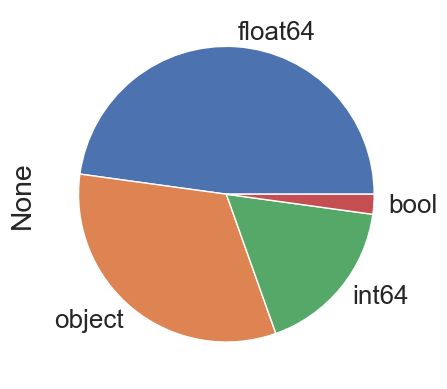

In [7]:
data.dtypes.value_counts().plot.pie()

In [8]:
data.isna().sum().sum()

19952

In [9]:
def ratio_NAN( data ):
    return pd.DataFrame( data.isnull().sum()/len(data)).transpose()

In [10]:
ratioNAN = ratio_NAN( data )

In [11]:
ratioNAN

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00474,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00237,0.00000,0.00000,0.00000,0.00000,0.00267,0.00592,0.00592,0.50267,0.50267,0.82346,0.82346,0.96475,0.24970,0.00207,0.00178,0.00267,0.00267,0.00148,0.00178,0.00267,0.00267,0.00267,0.00267,0.00267,0.00000,1.00000,0.00000,0.99052,0.00267,0.00267


In [12]:
def barplotsNAN( data ):
    txn = ratio_NAN( data)
    
    fig,ax = plt.subplots(figsize = (30,20))
    sns.barplot(data = txn)
    ax.tick_params(axis = "x", rotation = 100)
    plt.title('Taux de valeurs manquantes')
    plt.show() 

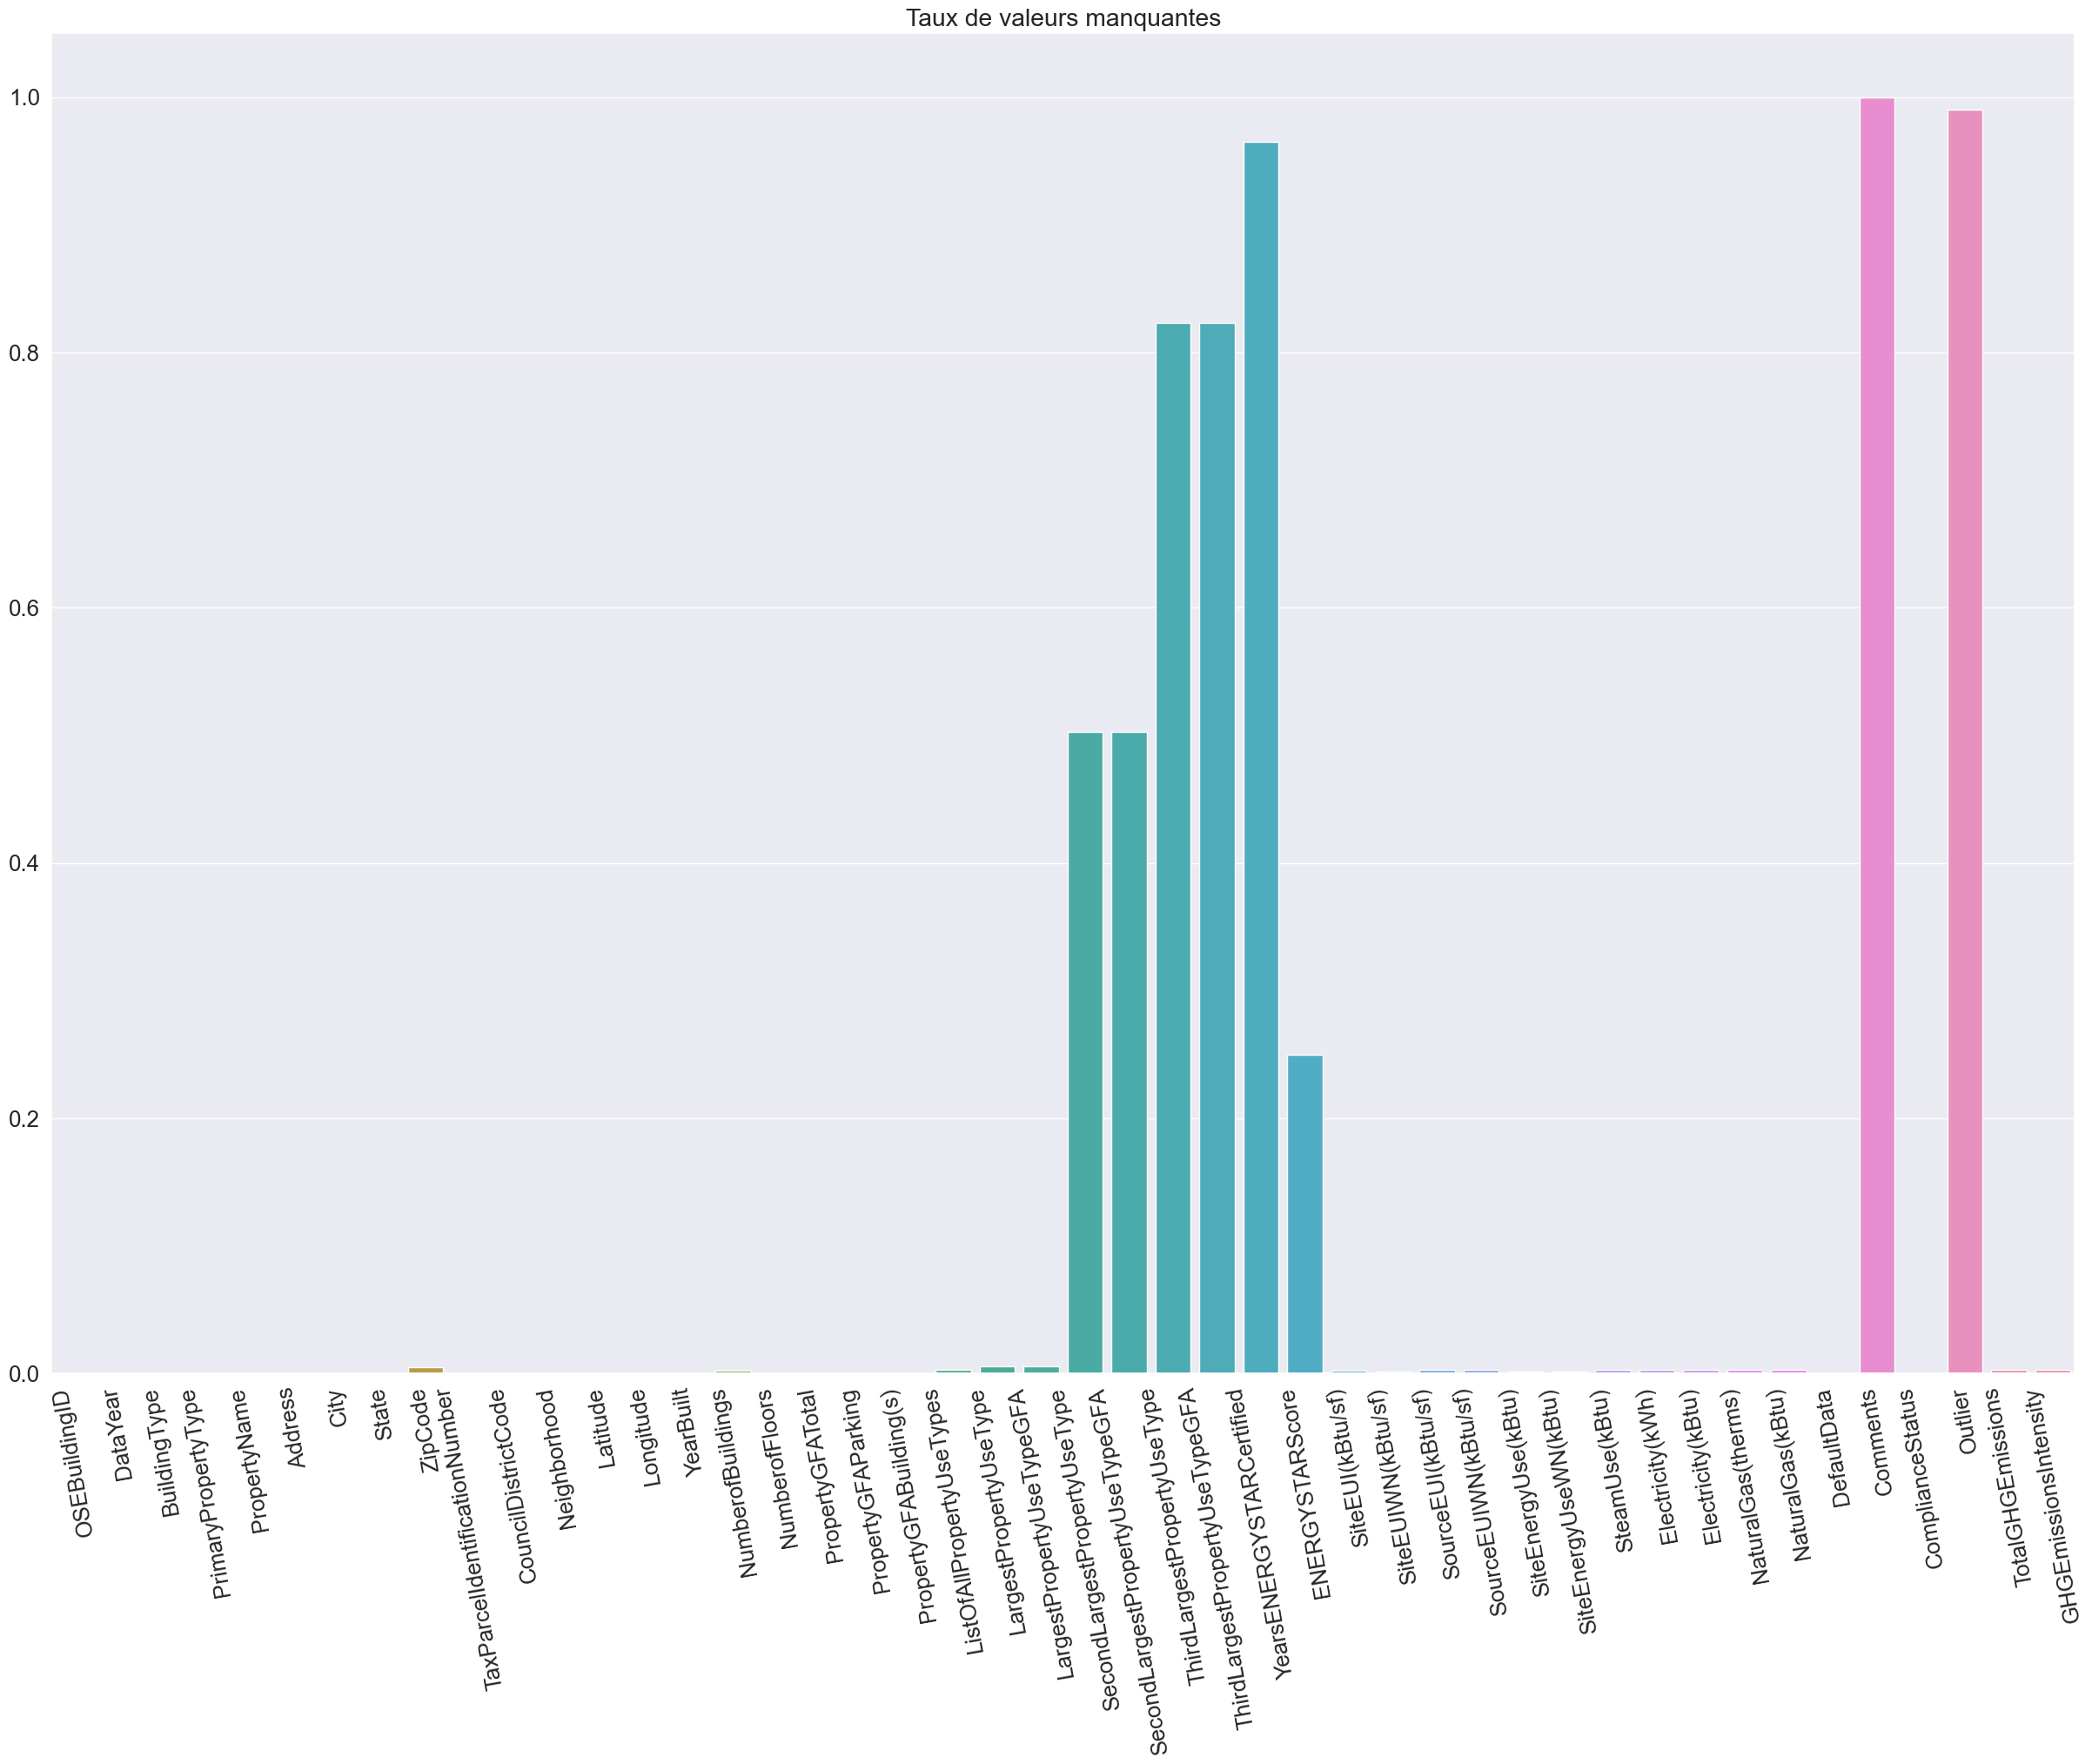

In [13]:
barplotsNAN( data )

In [14]:
cols_cate= data.select_dtypes(include = ['object']).columns
cols_cate

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address',
       'City', 'State', 'TaxParcelIdentificationNumber', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'YearsENERGYSTARCertified', 'ComplianceStatus', 'Outlier'],
      dtype='object')

In [15]:
cols_float= data.select_dtypes(include = ['float']).columns
cols_float

Index(['ZipCode', 'Latitude', 'Longitude', 'NumberofBuildings',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'Comments', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [16]:
cols_int= data.select_dtypes(include = ['int']).columns
cols_int

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)'],
      dtype='object')

In [17]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [18]:
def frequence (D):
    for i in D.columns:
        if (D[i].dtypes == "object"):
            print("----------")
            print(D[i].value_counts())
            print("----------")
            

frequence(data)

----------
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64
----------
----------
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Re

In [19]:
data["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [20]:
# Regrouper en categorie 
data["PrimaryPropertyType"].unique().tolist()

['Hotel',
 'Other',
 'Mid-Rise Multifamily',
 'Mixed Use Property',
 'K-12 School',
 'University',
 'Small- and Mid-Sized Office',
 'Self-Storage Facility',
 'Warehouse',
 'Large Office',
 'Senior Care Community',
 'Medical Office',
 'Retail Store',
 'Hospital',
 'Residence Hall',
 'Distribution Center',
 'Worship Facility',
 'Low-Rise Multifamily',
 'Supermarket / Grocery Store',
 'Laboratory',
 'Refrigerated Warehouse',
 'Restaurant',
 'High-Rise Multifamily',
 'Office']

In [21]:
data["LargestPropertyUseType"].unique().tolist()

['Hotel',
 'Police Station',
 'Other - Entertainment/Public Assembly',
 'Multifamily Housing',
 'Library',
 'Fitness Center/Health Club/Gym',
 'Social/Meeting Hall',
 'Courthouse',
 'Other',
 'K-12 School',
 'College/University',
 'Automobile Dealership',
 'Office',
 'Self-Storage Facility',
 'Non-Refrigerated Warehouse',
 'Other - Mall',
 'Senior Care Community',
 'Medical Office',
 'Retail Store',
 'Hospital (General Medical & Surgical)',
 'Museum',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Other - Lodging/Residential',
 'Residence Hall/Dormitory',
 'Other/Specialty Hospital',
 'Financial Office',
 'Distribution Center',
 'Parking',
 'Worship Facility',
 'Restaurant',
 'Data Center',
 'Laboratory',
 'Supermarket/Grocery Store',
 'Convention Center',
 'Urgent Care/Clinic/Other Outpatient',
 nan,
 'Other - Services',
 'Strip Mall',
 'Wholesale Club/Supercenter',
 'Refrigerated Warehouse',
 'Manufacturing/Industrial Plant',
 'Other - Recreation',
 'Lifestyle Center',
 'Other

In [22]:
data["SecondLargestPropertyUseType"].unique().tolist()

[nan,
 'Parking',
 'Office',
 'Restaurant',
 'K-12 School',
 'Laboratory',
 'Refrigerated Warehouse',
 'Non-Refrigerated Warehouse',
 'Other - Education',
 'Vocational School',
 'Retail Store',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Other - Entertainment/Public Assembly',
 'Data Center',
 'Swimming Pool',
 'Other',
 'Courthouse',
 'Residence Hall/Dormitory',
 'Distribution Center',
 'Self-Storage Facility',
 'Other - Services',
 'Movie Theater',
 'Supermarket/Grocery Store',
 'Medical Office',
 'Other - Recreation',
 'Convenience Store without Gas Station',
 'Performing Arts',
 'College/University',
 'Other - Restaurant/Bar',
 'Adult Education',
 'Enclosed Mall',
 'Multifamily Housing',
 'Bar/Nightclub',
 'Financial Office',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Manufacturing/Industrial Plant',
 'Other - Lodging/Residential',
 'Bank Branch',
 'Food Service',
 'Worship Facility',
 'Senior Care Community',
 'Fitness Center/Health Club/Gym',
 'Hotel',
 

In [23]:
data["ThirdLargestPropertyUseType"].unique().tolist()

[nan,
 'Restaurant',
 'Swimming Pool',
 'Data Center',
 'Office',
 'Retail Store',
 'Other - Entertainment/Public Assembly',
 'Non-Refrigerated Warehouse',
 'Other',
 'Distribution Center',
 'Food Service',
 'Other - Services',
 'Medical Office',
 'Parking',
 'Other - Utility',
 'Other - Lodging/Residential',
 'K-12 School',
 'Fitness Center/Health Club/Gym',
 'Social/Meeting Hall',
 'Pre-school/Daycare',
 'Convenience Store without Gas Station',
 'Financial Office',
 'Other - Restaurant/Bar',
 'Other - Education',
 'Multifamily Housing',
 'Laboratory',
 'Bank Branch',
 'Hotel',
 'Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Other - Recreation',
 'Self-Storage Facility',
 'Other - Technology/Science',
 'Refrigerated Warehouse',
 'Fast Food Restaurant',
 'Bar/Nightclub',
 'Manufacturing/Industrial Plant',
 'Food Sales',
 'Supermarket/Grocery Store',
 'Other/Specialty Hospital',
 'Worship Facility',
 'Strip Mall',
 'Residence Hall/Dormitory',
 'Vocational School',
 'College/U

In [24]:
# j'affiche les quartiers et je les met en minuscule car c'est en majuscule
data["Neighborhood"].unique().tolist()

['DOWNTOWN',
 'SOUTHEAST',
 'NORTHEAST',
 'EAST',
 'Central',
 'NORTH',
 'MAGNOLIA / QUEEN ANNE',
 'LAKE UNION',
 'GREATER DUWAMISH',
 'BALLARD',
 'NORTHWEST',
 'CENTRAL',
 'SOUTHWEST',
 'DELRIDGE',
 'Ballard',
 'North',
 'Delridge',
 'Northwest',
 'DELRIDGE NEIGHBORHOODS']

In [25]:
# j'ai mis ici en minuscule  
for i in range(len(data["Neighborhood"])):
    data["Neighborhood"][i] = data["Neighborhood"][i].lower()
data[["Neighborhood"]]

/var/folders/jx/cxdyp9956m9_6lhgbtf345c40000gn/T/ipykernel_2314/3537316856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Neighborhood"][i] = data["Neighborhood"][i].lower()


,Neighborhood
0,downtown
1,downtown
2,downtown
3,downtown
4,downtown
...,...
3371,greater duwamish
3372,downtown
3373,magnolia / queen anne
3374,greater duwamish


In [26]:
gr= ['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','PrimaryPropertyType']


In [27]:
# je regroupe ici en categorie pour plus de simplicité

gr_columns = {  # bureau
    
                'Financial Office' : 'bureau',
                'Other - Services' : 'bureau',
                'Bank Branch' : 'bureau',
                'Other - Public Services': 'bureau',
                "Police Station": 'bureau',
                "Office":'bureau',
                "Convention Center": 'bureau', 
                   
                # divertissement  
    
                'Other - Recreation': 'divertissement',
                'Other - Entertainment/Public Assembly': 'divertissement',
                'Performing Arts': 'divertissement',
                'Bar/Nightclub': 'divertissement',
                'Movie Theater': 'divertissement',
                'Museum': 'divertissement',
                'Social/Meeting Hall': 'divertissement',
                'Fitness Center/Health Club/Gym': 'divertissement',
                'Lifestyle Center ': 'divertissement',
                'Food Sales': 'divertissement',               
                'Fast Food Restaurant': 'divertissement',
                'Restaurant' : 'divertissement',
                'Other - Restaurant/Bar' : 'divertissement',
                'Food Service': 'divertissement' ,
                'Worship Facility': 'divertissement',
    
                #Education
             
                'University': 'Education',
                'College/University': 'Education',
                'Library': 'Education',
                'K-12 School' : 'Education',
                'Other - Education': 'Education',
                'Vocational School' : 'Education', 
                'Adult Education' : 'Education',
                'Pre-school/Daycare': 'Education',
                'Urgent Care/Clinic/Other Outpatient': 'Education',
                "Prison/Incarceration": 'Education',
    
                #Hébergement & Bien-être
                             
                'Residence Hall/Dormitory': 'hébergements & bien-être',
                'Hotel' : 'hébergements & bien-être',
                'Senior Care Community' : 'hébergements & bien-être',
                'Residential Care Facility' : 'hébergements & bien-être',
                'High-Rise Multifamily': 'hébergements & bien-être',              
                'Multifamily Housing': 'hébergements & bien-être',
                'Other - Lodging/Residential': 'hébergements & bien-être',
                "Personal Services (Health/Beauty, Dry Cleaning, etc)":'hébergements & bien-être',
                "Lifestyle Center":'hébergements & bien-être',
                
                # soins
    
                'Medical Office' : 'soins', 
                'Hospital': 'soins', 
                'Other/Specialty Hospital': 'soins',
                "Hospital (General Medical & Surgical)":  'soins',
                "Laboratory": 'soins',
    
                 #stockage & service
    
                'Wholesale Club/Supercenter': 'stockage & service',
                'Other - Mall': 'stockage & service',
                'Supermarket / Grocery Stor': 'stockage & service',
                'Retail Store' : 'stockage & service',
                'Supermarket/Grocery Store' : 'stockage & service',
                'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'stockage & service',
                'Automobile Dealership': 'stockage & service',
                'Convenience Store without Gas Station': 'stockage & service',
                'Personal Services': 'stockage & service',
                'Enclosed Mall': 'stockage & service',
                'Strip Mall': 'stockage & service',
                "Refrigerated Warehouse": 'stockage & service', 
                "Self-Storage Facility": 'stockage & service',
                'Other - Utility':'stockage & service',
                "Other":'stockage & service',
                "Parking":'stockage & service',       
                "Manufacturing/Industrial Plant":'stockage & service',
                "Non-Refrigerated Warehouse":'stockage & service',
                "Fire Station": 'stockage & service',
                "Courthouse": 'stockage & service',
                "Data Center" : 'stockage & service',
                "Distribution Center":'stockage & service',}

In [28]:
for column in gr:
    data[column] = data[column].replace(gr_columns)

In [29]:
# Pour voire le nombre d'apparition des groupes dans les variables séléctionner
for column in data[gr].columns:
    print(data[column].value_counts())
    print('\n')

hébergements & bien-être    1824
stockage & service           604
bureau                       515
Education                    183
divertissement               162
soins                         68
Name: LargestPropertyUseType, dtype: int64


stockage & service          1274
bureau                       239
divertissement                94
hébergements & bien-être      27
soins                         22
Education                     13
Swimming Pool                 10
Name: SecondLargestPropertyUseType, dtype: int64


stockage & service            278
bureau                        119
divertissement                111
Swimming Pool                  29
hébergements & bien-être       23
soins                          20
Education                      14
Other - Technology/Science      2
Name: ThirdLargestPropertyUseType, dtype: int64


Low-Rise Multifamily           987
Mid-Rise Multifamily           564
stockage & service             440
Small- and Mid-Sized Office    293
hébergements 

In [30]:
btp_without_residential = data[data['BuildingType'].isin(["NonResidential","Nonresidential COS","Nonresidential WA", "SPS-District K-12", "Campus"])]
btp_without_residential

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,hébergements & bien-être,Mayflower park hotel,405 Olive way,Seattle,WA,98101.00000,0659000030,7,downtown,47.61220,-122.33799,1927,1.00000,12,88434,0,88434,Hotel,hébergements & bien-être,88434.00000,NaN,NaN,NaN,NaN,NaN,60.00000,81.70000,84.30000,182.50000,189.00000,7226362.50000,7456910.00000,2003882.00000,1156514.25000,3946027.00000,12764.52930,1276453.00000,False,NaN,Compliant,NaN,249.98000,2.83000
1,2,2016,NonResidential,hébergements & bien-être,Paramount Hotel,724 Pine street,Seattle,WA,98101.00000,0659000220,7,downtown,47.61317,-122.33393,1996,1.00000,11,103566,15064,88502,"Hotel, Parking, Restaurant",hébergements & bien-être,83880.00000,stockage & service,15064.00000,divertissement,4622.00000,NaN,61.00000,94.80000,97.90000,176.10001,179.39999,8387933.00000,8664479.00000,0.00000,950425.18750,3242851.00000,51450.81641,5145082.00000,False,NaN,Compliant,NaN,295.86000,2.86000
2,3,2016,NonResidential,hébergements & bien-être,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.00000,0659000475,7,downtown,47.61393,-122.33810,1969,1.00000,41,956110,196718,759392,Hotel,hébergements & bien-être,756493.00000,NaN,NaN,NaN,NaN,NaN,43.00000,96.00000,97.70000,241.89999,244.10001,72587024.00000,73937112.00000,21566554.00000,14515435.00000,49526664.00000,14938.00000,1493800.00000,False,NaN,Compliant,NaN,2089.28000,2.19000
3,5,2016,NonResidential,hébergements & bien-être,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.00000,0659000640,7,downtown,47.61412,-122.33664,1926,1.00000,10,61320,0,61320,Hotel,hébergements & bien-être,61320.00000,NaN,NaN,NaN,NaN,NaN,56.00000,110.80000,113.30000,216.20000,224.00000,6794584.00000,6946800.50000,2214446.25000,811525.31250,2768924.00000,18112.13086,1811213.00000,False,NaN,Compliant,NaN,286.43000,4.67000
4,8,2016,NonResidential,hébergements & bien-être,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.00000,0659000970,7,downtown,47.61375,-122.34047,1980,1.00000,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",hébergements & bien-être,123445.00000,stockage & service,68009.00000,Swimming Pool,0.00000,NaN,75.00000,114.80000,118.70000,211.39999,215.60001,14172606.00000,14656503.00000,0.00000,1573448.62500,5368607.00000,88039.98438,8803998.00000,False,NaN,Compliant,NaN,505.01000,2.88000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,bureau,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,greater duwamish,47.56722,-122.31154,1990,1.00000,1,12294,0,12294,Office,bureau,12294.00000,NaN,NaN,NaN,NaN,NaN,46.00000,69.10000,76.70000,161.70000,176.10001,849745.68750,943003.18750,0.00000,153655.00000,524270.86000,3254.75024,325475.02440,True,NaN,Error - Correct Default Data,NaN,20.94000,1.70000
3372,50223,2016,Nonresidential COS,stockage & service,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,downtown,47.59625,-122.32283,2004,1.00000,1,16000,0,16000,Other - Recreation,divertissement,16000.00000,NaN,NaN,NaN,NaN,NaN,NaN,59.40000,65.90000,114.20000,118.90000,950276.18750,1053

In [31]:
btp_without_residential = btp_without_residential.reset_index(drop=True)

In [32]:
btp_without_residential["Latitude"].unique()

array([47.6122 , 47.61317, 47.61393, ..., 47.59625, 47.52832, 47.53939])

In [33]:
btp_without_residential["Longitude"].unique()

array([-122.33799, -122.33393, -122.3381 , ..., -122.35784, -122.32431,
       -122.29536])

In [34]:
print(btp_without_residential["Latitude"].mean())
print(btp_without_residential["Longitude"].mean())

47.61605422648087
-122.33290769688264


In [35]:
from math import sin, cos, sqrt, atan2, radians

# approximation rayon de la terre en km

def distance_from_downtown(row):
    
    R = 6373.0

    lon1 = radians(row[1]) # longitude
    lat1 = radians(row[0]) # latitude 
    lon2 = radians(-122.35147) # A faire : longitude du centre ville Seattle 
    lat2 = radians(47.6205) # A faire : moyenne latitude du centre ville Seattle

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    return distance

In [36]:
btp_without_residential["distance"] = btp_without_residential[["Latitude","Longitude"]].apply(distance_from_downtown, axis = 1)
btp_without_residential[["distance"]]

,distance
0,1.36889
1,1.54735
2,1.24055
3,1.31908
4,1.11532
...,...
1663,6.64022
1664,3.44794
1665,1.83618
1666,10.45376


In [37]:
print("distance minimal : ",min(btp_without_residential["distance"]), "Km")
print("distance maximal : ",max(btp_without_residential["distance"]), "Km")

distance minimal :  0.08571177165700604 Km
distance maximal :  15.038823258033734 Km


In [38]:
btp_without_residential.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,distance
0,1,2016,NonResidential,hébergements & bien-être,Mayflower park hotel,405 Olive way,Seattle,WA,98101.00000,0659000030,7,downtown,47.61220,-122.33799,1927,1.00000,12,88434,0,88434,Hotel,hébergements & bien-être,88434.00000,NaN,NaN,NaN,NaN,NaN,60.00000,81.70000,84.30000,182.50000,189.00000,7226362.50000,7456910.00000,2003882.00000,1156514.25000,3946027.00000,12764.52930,1276453.00000,False,NaN,Compliant,NaN,249.98000,2.83000,1.36889


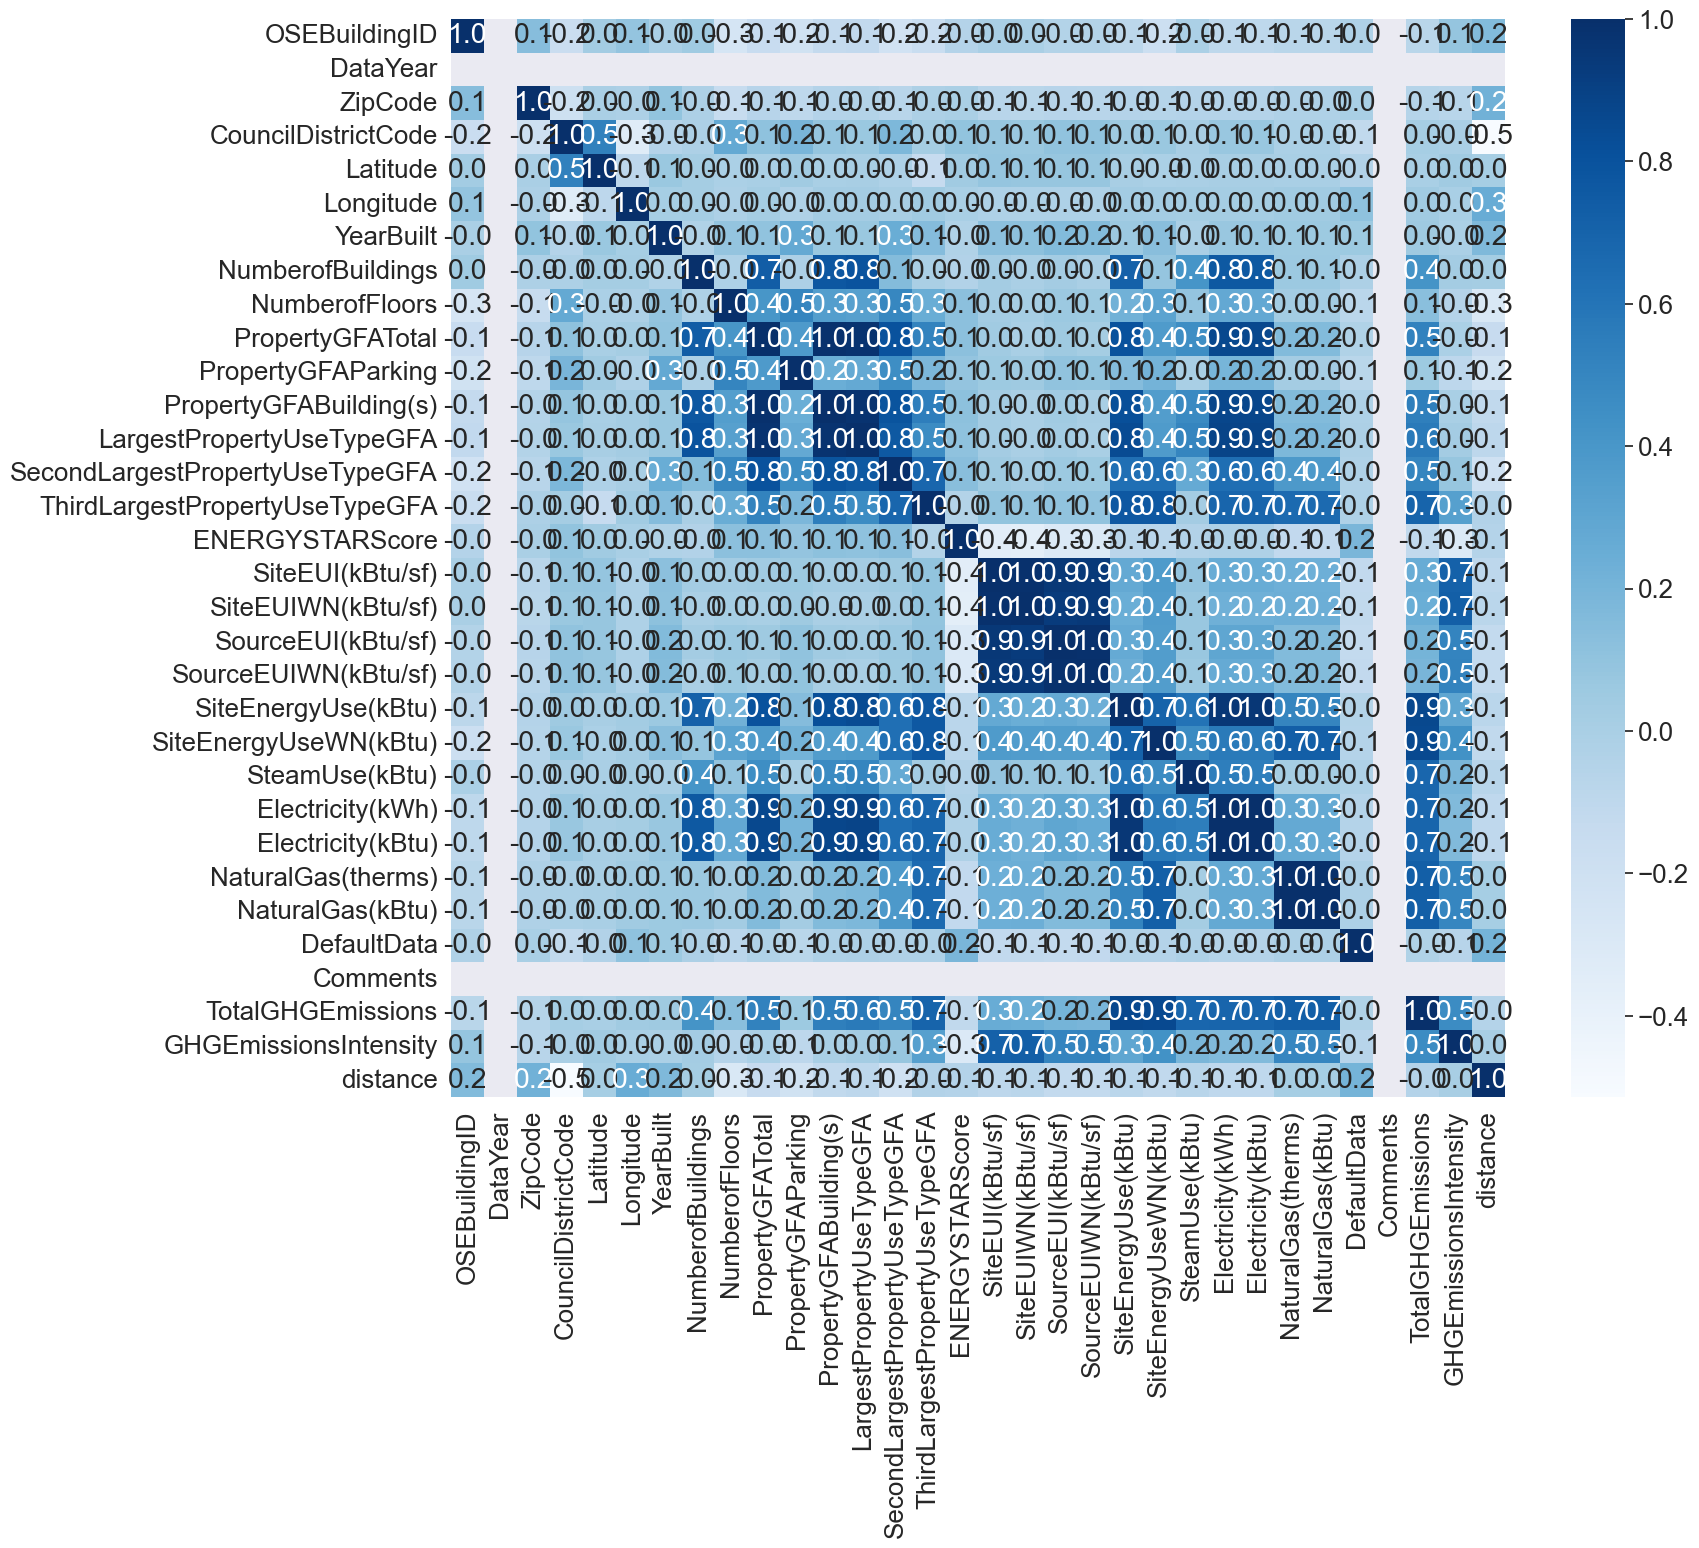

In [39]:
# matrice de corrélation pour voire les colonnes numérique qui sont fortement corrélés
plt.figure(figsize=(17,14))
sns.heatmap(btp_without_residential.corr('pearson'), fmt=".1f",annot=True, cmap = "Blues");

In [40]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [41]:
# On supprime les colonnes corrélées ou celle qu'on à pas besoin 
columns = ['OSEBuildingID',"DataYear","ZipCode", "SourceEUI(kBtu/sf)", "Latitude", "Longitude", 'PropertyName', 'Address', 'ListOfAllPropertyUseTypes',
           'Electricity(kWh)', 'Electricity(kBtu)',  'City', 'State', 'TaxParcelIdentificationNumber', 
           'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified',
           'PropertyGFAParking', 'GHGEmissionsIntensity', 'SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus','Outlier']

downtown = btp_without_residential.drop(labels=columns, axis=1)

In [42]:
downtown.head(1)

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,distance
0,NonResidential,hébergements & bien-être,7,downtown,1927,1.00000,12,88434,88434,hébergements & bien-être,60.00000,7226362.50000,249.98000,1.36889


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

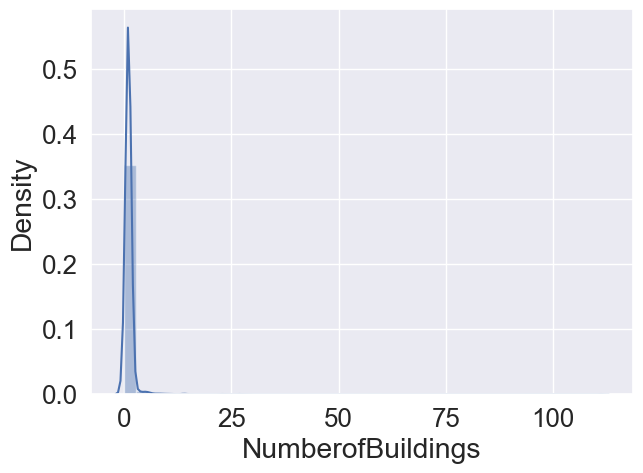

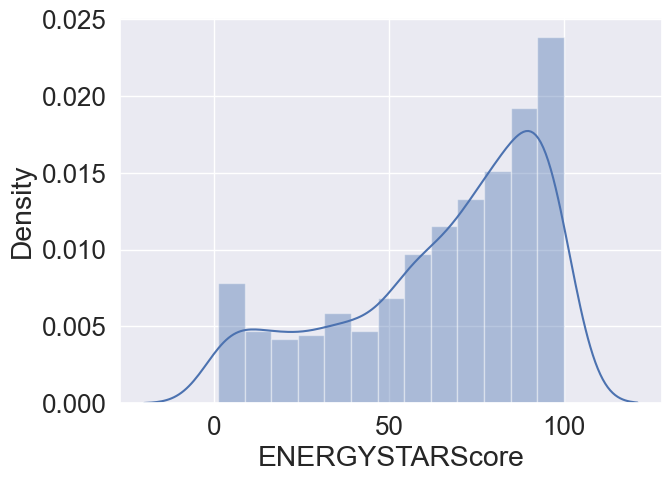

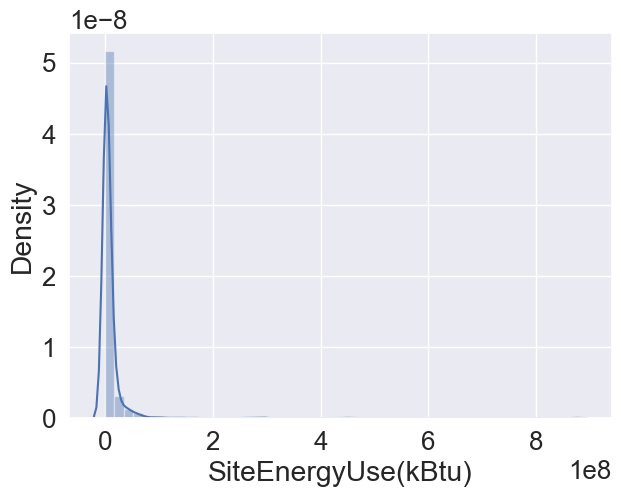

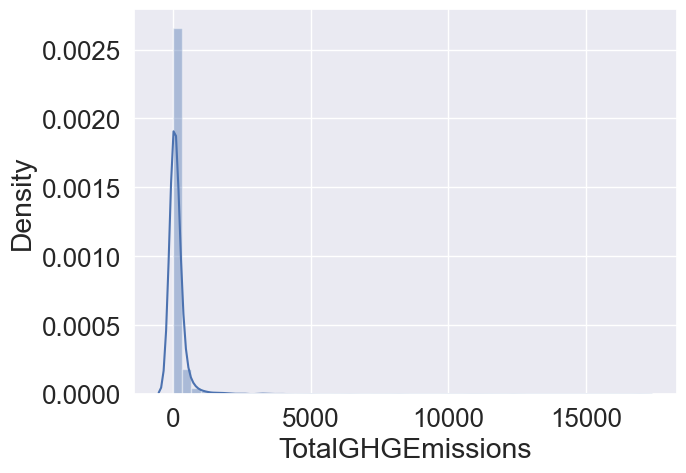

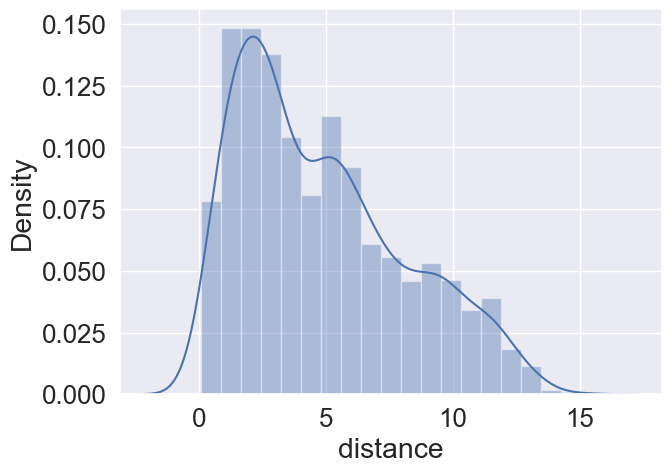

In [43]:
# Analyse univariée pour voire les distribution des valeurs numériques.
for col in downtown.select_dtypes("float"):
    plt.figure(figsize=(7,5))
    sns.distplot(downtown[col])

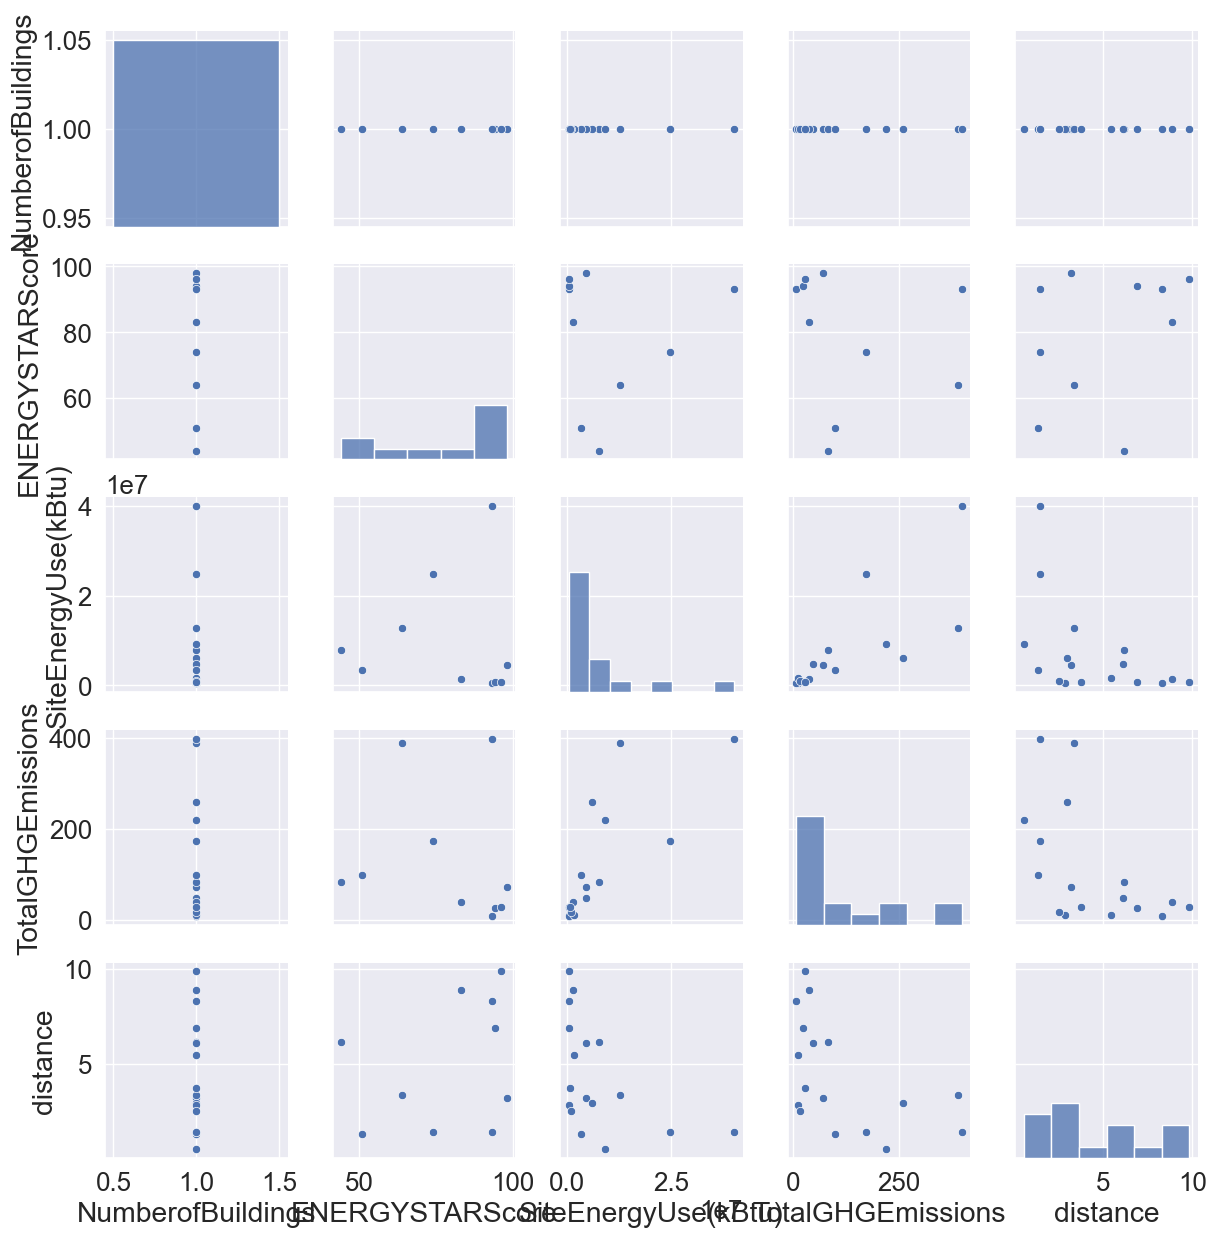

In [44]:
# Analyse bivariée pour voire les distribution des valeurs numériques.
df_pairplot= downtown.select_dtypes("float")

df_pairplot=df_pairplot.sample(frac=0.01)
sns.pairplot(data=df_pairplot)

In [45]:
downtown.select_dtypes(['category','object']).nunique()

BuildingType               5
PrimaryPropertyType       13
Neighborhood              14
LargestPropertyUseType     6
dtype: int64

In [46]:
colonne_categoriel = downtown.select_dtypes(['object']).columns.tolist()
colonne_categoriel

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType']

In [47]:
colonne_num = downtown.select_dtypes(include=['int64','float64']).columns
colonne_num.tolist()

['CouncilDistrictCode',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'distance']

In [48]:
df =  downtown[['Neighborhood','PropertyGFATotal', 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions','YearBuilt', 'NumberofBuildings', 
                      'NumberofFloors','LargestPropertyUseType','ENERGYSTARScore', 'distance']]
df

,Neighborhood,PropertyGFATotal,SiteEnergyUse(kBtu),TotalGHGEmissions,YearBuilt,NumberofBuildings,NumberofFloors,LargestPropertyUseType,ENERGYSTARScore,distance
0,downtown,88434,7226362.50000,249.98000,1927,1.00000,12,hébergements & bien-être,60.00000,1.36889
1,downtown,103566,8387933.00000,295.86000,1996,1.00000,11,hébergements & bien-être,61.00000,1.54735
2,downtown,956110,72587024.00000,2089.28000,1969,1.00000,41,hébergements & bien-être,43.00000,1.24055
3,downtown,61320,6794584.00000,286.43000,1926,1.00000,10,hébergements & bien-être,56.00000,1.31908
4,downtown,175580,14172606.00000,505.01000,1980,1.00000,18,hébergements & bien-être,75.00000,1.11532
...,...,...,...,...,...,...,...,...,...,...
1663,greater duwamish,12294,849745.68750,20.94000,1990,1.00000,1,bureau,46.00000,6.64022
1664,downtown,16000,950276.18750,32.17000,2004,1.00000,1,divertissement,NaN,3.44794
1665,magnolia / queen anne,13157,5765898.00000,223.54000,1974,1.00000,1,divertissement,NaN,1.83618
1666,greater duwamish,14101,719471.18750,22.11000,1989,1.00000,1,divertissement,NaN,10.45376


In [49]:
df.isnull().sum().sum()

586

In [50]:
df.dropna(inplace=True)

/var/folders/jx/cxdyp9956m9_6lhgbtf345c40000gn/T/ipykernel_2314/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [51]:
cols_cat= df.select_dtypes(['object']).columns.tolist()
cols_cat

['Neighborhood', 'LargestPropertyUseType']

In [52]:
cols_nums = df.select_dtypes(include=['int64','float64']).columns
cols_nums

Index(['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore',
       'distance'],
      dtype='object')

###### Le One-hot encoding permet de traiter les données sous formes vectorielle.
###### En utilisant cette fonctionnalité, un vecteur de valeurs binaires de la dimension : nombre de classes X 1 est automatiquement créé et utilisé.

###### Standardisez les caractéristiques en mettant à l'échelle la variance unitaire, réajustes les données pour des répartitions normales. 

In [53]:
sc= StandardScaler(with_std=True, with_mean=True)
df[cols_nums] = sc.fit_transform(df[cols_nums])
df

/var/folders/jx/cxdyp9956m9_6lhgbtf345c40000gn/T/ipykernel_2314/3196246252.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_nums] = sc.fit_transform(df[cols_nums])


,Neighborhood,PropertyGFATotal,SiteEnergyUse(kBtu),TotalGHGEmissions,YearBuilt,NumberofBuildings,NumberofFloors,LargestPropertyUseType,ENERGYSTARScore,distance
0,downtown,-0.18113,-0.04651,0.07920,-1.15292,-0.04707,0.90919,hébergements & bien-être,-0.19108,-1.06756
1,downtown,-0.10695,0.00045,0.13488,1.01960,-0.04707,0.78181,hébergements & bien-être,-0.15597,-1.01397
2,downtown,4.07237,2.59553,2.31137,0.16948,-0.04707,4.60336,hébergements & bien-être,-0.78784,-1.10610
3,downtown,-0.31405,-0.06396,0.12344,-1.18440,-0.04707,0.65442,hébergements & bien-être,-0.33149,-1.08252
4,downtown,0.24607,0.23428,0.38871,0.51582,-0.04707,1.67350,hébergements & bien-être,0.33548,-1.14370
...,...,...,...,...,...,...,...,...,...,...
1647,greater duwamish,-0.49215,-0.15992,-0.06058,-1.08995,-0.04707,-0.36466,bureau,-1.98136,1.71342
1649,greater duwamish,-0.39405,-0.28501,-0.21296,1.61782,-0.04707,-0.23727,Education,0.40569,-0.00160
1658,magnolia / queen anne,-0.54768,-0.31829,-0.21992,-0.36578,-0.04707,-0.49204,bureau,0.33548,-0.74040
1661,southeast,-0.53917,-0.32294,-0.21472,-0.11389,-0.04707,-0.49204,bureau,0.96734,1.01940


In [54]:
OHT=OneHotEncoder(sparse= False)  #pour avoir une matrice non sparse (Une matrice est qualifiée de 'sparse' si elle comporte majoritairement des coefficients nuls, ou si le pourcentage des coefficients non nuls est faible)
X_OHT= OHT.fit_transform(df[cols_cat])

X_OHT.shape, X_OHT

((1092, 19),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [55]:
false_cols= ["code_"+str(i+1) for i in range(10)]
false_cols.extend(["type_"+str(i+1) for i in range(9)])

In [56]:
false_cols

['code_1',
 'code_2',
 'code_3',
 'code_4',
 'code_5',
 'code_6',
 'code_7',
 'code_8',
 'code_9',
 'code_10',
 'type_1',
 'type_2',
 'type_3',
 'type_4',
 'type_5',
 'type_6',
 'type_7',
 'type_8',
 'type_9']

In [57]:
df[false_cols]=X_OHT
df

/var/folders/jx/cxdyp9956m9_6lhgbtf345c40000gn/T/ipykernel_2314/1759468045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[false_cols]=X_OHT
/var/folders/jx/cxdyp9956m9_6lhgbtf345c40000gn/T/ipykernel_2314/1759468045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[false_cols]=X_OHT
/var/folders/jx/cxdyp9956m9_6lhgbtf345c40000gn/T/ipykernel_2314/1759468045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,Neighborhood,PropertyGFATotal,SiteEnergyUse(kBtu),TotalGHGEmissions,YearBuilt,NumberofBuildings,NumberofFloors,LargestPropertyUseType,ENERGYSTARScore,distance,code_1,code_2,code_3,code_4,code_5,code_6,code_7,code_8,code_9,code_10,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9
0,downtown,-0.18113,-0.04651,0.07920,-1.15292,-0.04707,0.90919,hébergements & bien-être,-0.19108,-1.06756,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,downtown,-0.10695,0.00045,0.13488,1.01960,-0.04707,0.78181,hébergements & bien-être,-0.15597,-1.01397,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,downtown,4.07237,2.59553,2.31137,0.16948,-0.04707,4.60336,hébergements & bien-être,-0.78784,-1.10610,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,downtown,-0.31405,-0.06396,0.12344,-1.18440,-0.04707,0.65442,hébergements & bien-être,-0.33149,-1.08252,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,downtown,0.24607,0.23428,0.38871,0.51582,-0.04707,1.67350,hébergements & bien-être,0.33548,-1.14370,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,greater duwamish,-0.49215,-0.15992,-0.06058,-1.08995,-0.04707,-0.36466,bureau,-1.98136,1.71342,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1649,greater duwamish,-0.39405,-0.28501,-0.21296,1.61782,-0.04707,-0.23727,Education,0.40569,-0.00160,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1658,magnolia / queen anne,-0.54768,-0.31829,-0.21992,-0.36578,-0.04707,-0.49204,bureau,0.33548,-0.74040,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1661,southeast,-0.53917,-0.32294,-0.21472,-0.11389,-0.04707,-0.49204,bureau,0.96734,1.01940,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000


In [58]:
df[["Neighborhood"] + false_cols].drop_duplicates().sort_values(by=["Neighborhood"]).reset_index(drop=True)

,Neighborhood,code_1,code_2,code_3,code_4,code_5,code_6,code_7,code_8,code_9,code_10,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9
0,ballard,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,ballard,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,ballard,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,ballard,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
4,ballard,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,southwest,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
72,southwest,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
73,southwest,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
74,southwest,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000


In [59]:
df = df.drop(columns = ["Neighborhood", "LargestPropertyUseType"])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1663
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PropertyGFATotal     1092 non-null   float64
 1   SiteEnergyUse(kBtu)  1092 non-null   float64
 2   TotalGHGEmissions    1092 non-null   float64
 3   YearBuilt            1092 non-null   float64
 4   NumberofBuildings    1092 non-null   float64
 5   NumberofFloors       1092 non-null   float64
 6   ENERGYSTARScore      1092 non-null   float64
 7   distance             1092 non-null   float64
 8   code_1               1092 non-null   float64
 9   code_2               1092 non-null   float64
 10  code_3               1092 non-null   float64
 11  code_4               1092 non-null   float64
 12  code_5               1092 non-null   float64
 13  code_6               1092 non-null   float64
 14  code_7               1092 non-null   float64
 15  code_8               1092 non-null   f

In [61]:
df.to_csv('df.csv')

In [62]:
df

,PropertyGFATotal,SiteEnergyUse(kBtu),TotalGHGEmissions,YearBuilt,NumberofBuildings,NumberofFloors,ENERGYSTARScore,distance,code_1,code_2,code_3,code_4,code_5,code_6,code_7,code_8,code_9,code_10,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9
0,-0.18113,-0.04651,0.07920,-1.15292,-0.04707,0.90919,-0.19108,-1.06756,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,-0.10695,0.00045,0.13488,1.01960,-0.04707,0.78181,-0.15597,-1.01397,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,4.07237,2.59553,2.31137,0.16948,-0.04707,4.60336,-0.78784,-1.10610,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,-0.31405,-0.06396,0.12344,-1.18440,-0.04707,0.65442,-0.33149,-1.08252,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,0.24607,0.23428,0.38871,0.51582,-0.04707,1.67350,0.33548,-1.14370,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,-0.49215,-0.15992,-0.06058,-1.08995,-0.04707,-0.36466,-1.98136,1.71342,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1649,-0.39405,-0.28501,-0.21296,1.61782,-0.04707,-0.23727,0.40569,-0.00160,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1658,-0.54768,-0.31829,-0.21992,-0.36578,-0.04707,-0.49204,0.33548,-0.74040,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1661,-0.53917,-0.32294,-0.21472,-0.11389,-0.04707,-0.49204,0.96734,1.01940,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000


In [63]:
corr_cols_list_energy = cols_nums.tolist() + false_cols
corr_cols_list_energy.remove("SiteEnergyUse(kBtu)")

corr_list_energy=[]
for col in corr_cols_list_energy:
    corr_list_energy.append(round(df["SiteEnergyUse(kBtu)"].corr(df[col]),2) )

In [64]:
df_corr_energy= pd.DataFrame(data=zip(corr_cols_list_energy, corr_list_energy), columns=["col_name", "corr"]).sort_values("corr", ascending=False).reset_index(drop=True)
df_corr_energy

,col_name,corr
0,TotalGHGEmissions,0.92000
1,PropertyGFATotal,0.57000
2,NumberofBuildings,0.48000
3,NumberofFloors,0.33000
4,type_8,0.27000
5,YearBuilt,0.12000
6,code_4,0.12000
7,code_5,0.09000
8,type_7,0.03000
9,type_5,0.03000


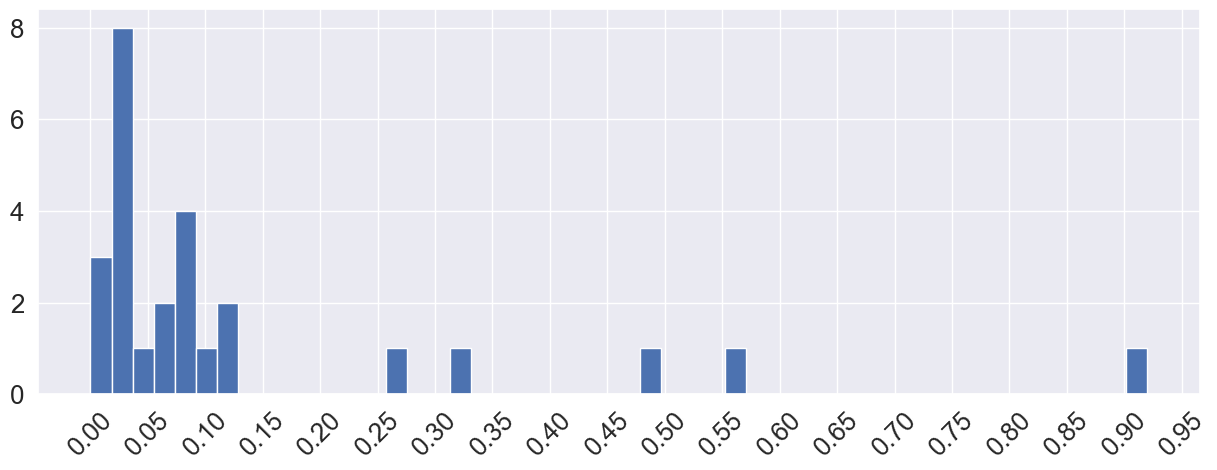

In [65]:
fig, ax= plt.subplots(figsize=(15, 5))
abs(df_corr_energy["corr"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1, 0.05))
plt.xticks(rotation=45)
plt.show()

In [66]:
features = df_corr_energy.loc[(abs(df_corr_energy["corr"])<0.8) & (abs(df_corr_energy["corr"])>0.1), "col_name"].tolist()
features                           

['PropertyGFATotal',
 'NumberofBuildings',
 'NumberofFloors',
 'type_8',
 'YearBuilt',
 'code_4']

In [67]:
features_energy_select = features + ["SiteEnergyUse(kBtu)"]
df_energy = df[features_energy_select]
df_energy

,PropertyGFATotal,NumberofBuildings,NumberofFloors,type_8,YearBuilt,code_4,SiteEnergyUse(kBtu)
0,-0.18113,-0.04707,0.90919,0.00000,-1.15292,1.00000,-0.04651
1,-0.10695,-0.04707,0.78181,0.00000,1.01960,1.00000,0.00045
2,4.07237,-0.04707,4.60336,0.00000,0.16948,1.00000,2.59553
3,-0.31405,-0.04707,0.65442,0.00000,-1.18440,1.00000,-0.06396
4,0.24607,-0.04707,1.67350,0.00000,0.51582,1.00000,0.23428
...,...,...,...,...,...,...,...
1647,-0.49215,-0.04707,-0.36466,0.00000,-1.08995,0.00000,-0.15992
1649,-0.39405,-0.04707,-0.23727,0.00000,1.61782,0.00000,-0.28501
1658,-0.54768,-0.04707,-0.49204,0.00000,-0.36578,0.00000,-0.31829
1661,-0.53917,-0.04707,-0.49204,0.00000,-0.11389,0.00000,-0.32294


In [68]:
corr_cols_list_ghg = cols_nums.tolist() + false_cols
corr_cols_list_ghg.remove("TotalGHGEmissions")

corr_list_ghg=[]
for col in corr_cols_list_ghg:
    corr_list_ghg.append(round(df["TotalGHGEmissions"].corr(df[col]),2) )

In [69]:
df_corr_ghg= pd.DataFrame(data=zip(corr_cols_list_ghg, corr_list_ghg), columns=["col_name", "corr"]).sort_values("corr", ascending=False).reset_index(drop=True)
df_corr_ghg

,col_name,corr
0,SiteEnergyUse(kBtu),0.92000
1,NumberofBuildings,0.54000
2,PropertyGFATotal,0.40000
3,type_8,0.28000
4,NumberofFloors,0.14000
5,code_5,0.13000
6,YearBuilt,0.06000
7,type_7,0.06000
8,code_4,0.02000
9,code_10,0.01000


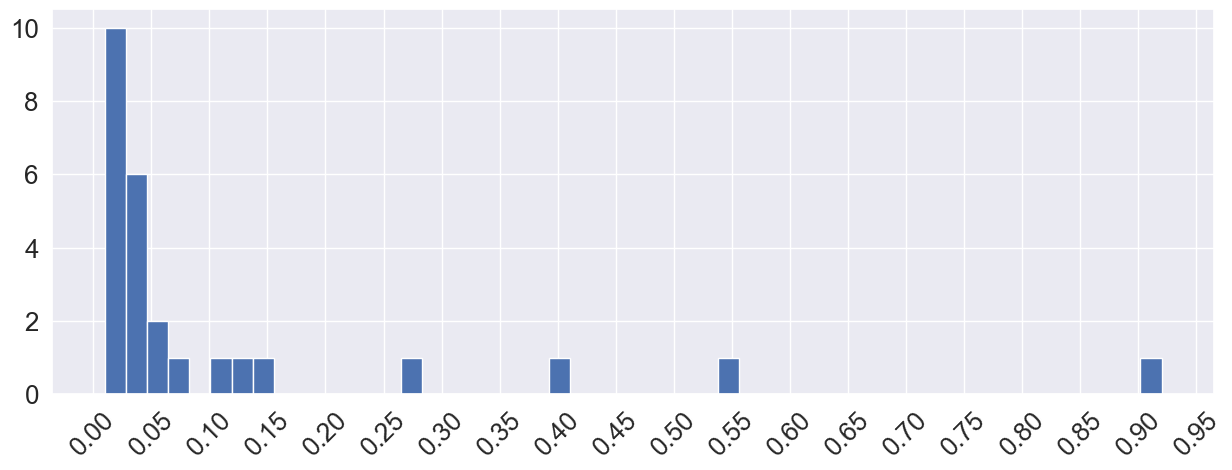

In [70]:
fig, ax= plt.subplots(figsize=(15, 5))
abs(df_corr_ghg["corr"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1, 0.05))
plt.xticks(rotation=45)
plt.show()

In [71]:
features_ghg = df_corr_ghg.loc[(abs(df_corr_ghg["corr"])<0.8) & (abs(df_corr_ghg["corr"])>0.1), "col_name"].tolist()
features_ghg                            

['NumberofBuildings',
 'PropertyGFATotal',
 'type_8',
 'NumberofFloors',
 'code_5',
 'ENERGYSTARScore']

In [72]:
features_ghg_select = features_ghg + ["TotalGHGEmissions"]
df_ghg = df[features_ghg_select]
df_ghg

,NumberofBuildings,PropertyGFATotal,type_8,NumberofFloors,code_5,ENERGYSTARScore,TotalGHGEmissions
0,-0.04707,-0.18113,0.00000,0.90919,0.00000,-0.19108,0.07920
1,-0.04707,-0.10695,0.00000,0.78181,0.00000,-0.15597,0.13488
2,-0.04707,4.07237,0.00000,4.60336,0.00000,-0.78784,2.31137
3,-0.04707,-0.31405,0.00000,0.65442,0.00000,-0.33149,0.12344
4,-0.04707,0.24607,0.00000,1.67350,0.00000,0.33548,0.38871
...,...,...,...,...,...,...,...
1647,-0.04707,-0.49215,0.00000,-0.36466,0.00000,-1.98136,-0.06058
1649,-0.04707,-0.39405,0.00000,-0.23727,0.00000,0.40569,-0.21296
1658,-0.04707,-0.54768,0.00000,-0.49204,0.00000,0.33548,-0.21992
1661,-0.04707,-0.53917,0.00000,-0.49204,0.00000,0.96734,-0.21472
